In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold

In [20]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os
from degree_days import dds



def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [21]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [22]:
sd_df, sd_dfc = create_matrix_single_region("SanDiego", year)
sd_tensor = get_tensor(sd_df, sd_dfc)
au_df, au_dfc = create_matrix_single_region('Austin', year)
au_tensor = get_tensor(au_df, au_dfc)
sd_tensor_copy = sd_tensor.copy()
au_tensor_copy = au_tensor.copy()

In [35]:
a=2
case=2
cost='abs'
H_au, A_au, T_au = learn_HAT(case, au_tensor_copy, a, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost)


In [36]:
H_sd, A_sd, T_sd = learn_HAT(case, sd_tensor_copy, a, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost)

In [37]:
T_sd

array([[ 2.7373918 ,  5.483737  ,  0.        ],
       [ 2.51474511,  4.73472896,  0.        ],
       [ 3.42995343,  4.35415882,  0.        ],
       [ 4.47318013,  3.00934251,  0.56585557],
       [ 3.30831757,  2.5911144 ,  4.70036959],
       [ 5.80414166,  0.2621231 ,  2.99336574],
       [ 2.42841363,  2.36701749,  8.02668915],
       [ 3.21304334,  1.15030641,  9.06045135],
       [ 1.99887471,  3.15250419,  9.88394306],
       [ 4.01488298,  3.21894855,  3.64208518],
       [ 4.08702319,  4.0930259 ,  0.10978917],
       [ 5.31206824,  3.98835299,  0.0492658 ]])

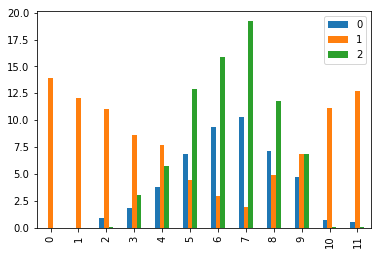

In [38]:
pd.DataFrame(T_au).plot(kind='bar')

In [89]:
for appliance in APPLIANCES_ORDER:
    print appliance

aggregate
hvac
fridge
mw
dw
wm
oven


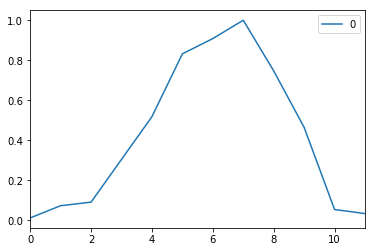

In [39]:
pd.DataFrame(dds[2014]['Austin']).plot()

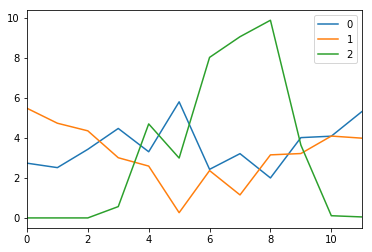

In [40]:
pd.DataFrame(T_sd).plot()

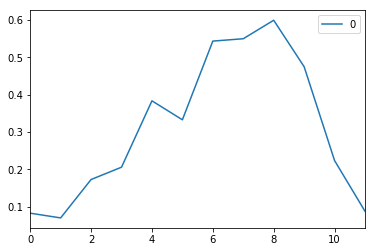

In [41]:
pd.DataFrame(dds[2014]['SanDiego']).plot()

In [62]:
AT_au = np.einsum('Nab, Ob -> NaO', A_au, T_au)

In [60]:
AT_sd = np.einsum('Nab, Ob -> NaO', A_sd, T_sd)

In [74]:
X_au = np.einsum('Ma, NaO -> MNO', H_au, AT_au)

In [81]:
pd.DataFrame(H_au)

,0,1
0,0.575928,0.429017
1,1.537271,1.569603
2,0.491342,0.449117
3,3.444524,0.069936
4,0.736504,0.066268
5,2.328530,1.402155
6,2.377462,1.941098
7,0.921961,1.750726
8,0.629678,0.438022
9,0.594656,1.252531


In [90]:
pd.DataFrame(AT_au[2].T)

,0,1
0,11.542276,24.783078
1,10.011608,21.496494
2,9.769674,20.661057
3,9.050449,20.027073
4,10.114814,22.717940
5,11.021232,26.462689
6,12.059975,29.007112
7,12.470767,30.982628
8,11.261441,26.408591
9,10.256038,23.126149


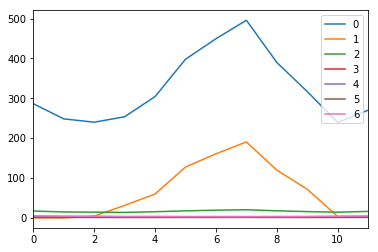

In [86]:
pd.DataFrame(X_au[0].T).plot()

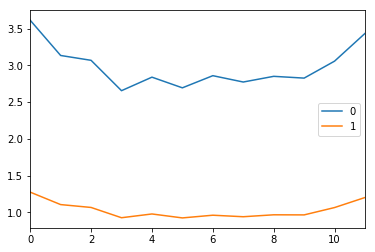

In [100]:
pd.DataFrame(AT_au[3].T).plot()

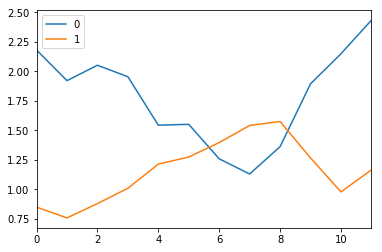

In [101]:
pd.DataFrame(AT_sd[3].T).plot()

In [13]:
T_sd

array([[ 5.47762386,  0.        ],
       [ 4.82559199,  0.        ],
       [ 5.30817367,  0.        ],
       [ 5.29227929,  0.68079861],
       [ 4.57482162,  4.63097921],
       [ 4.86502524,  3.18419986],
       [ 4.06051521,  7.87547525],
       [ 3.96220786,  9.06247664],
       [ 4.3456739 ,  9.64913735],
       [ 5.3594313 ,  3.65611818],
       [ 5.68151782,  0.08397702],
       [ 6.50460356,  0.16054321]])

In [47]:
A_au[1]

array([[  0.        ,  19.39461903],
       [  0.        ,   0.66713144]])

In [48]:
A_sd[1]

array([[ 0.        ,  1.19209959],
       [ 0.        ,  9.13924977]])

In [52]:
np.c_[A_au[1], A_sd[1]]

array([[  0.        ,  19.39461903,   0.        ,   1.19209959],
       [  0.        ,   0.66713144,   0.        ,   9.13924977]])